In [138]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [139]:
!ls -l

total 1013956
-rwxr-xr-x. 1 dsc vboxsf 554970628 Dec 31  2015 bookings.csv.bz2
-rw-r--r--. 1 dsc vboxsf     16679 Dec 30 06:10 exercise_2_challenge.ipynb
-rw-r--r--. 1 dsc vboxsf     15523 Dec 30 04:38 exercise_2_challenge_using_chunks.ipynb
-rw-r--r--. 1 dsc vboxsf     29495 Dec 30 06:38 exercise_3_challenge.ipynb
-rw-r--r--. 1 dsc vboxsf     42505 Dec 30 01:34 mini_bookings.csv
-rwxr-xr-x. 1 dsc vboxsf 483188920 Dec 31  2015 searches.csv.bz2
-rw-r--r--. 1 dsc vboxsf      2367 Dec 30 01:32 Untitled.ipynb


In [140]:
import bz2
df1 = pd.read_csv('searches.csv.bz2', sep='^',nrows=100000, usecols=(['Date','Destination']))

In [141]:
df1.Date[1]

'2013-01-01'

In [142]:
df1 = pd.read_csv('searches.csv.bz2', sep='^',nrows=100000, usecols=(['Date','Destination']), parse_dates=['Date'])

In [143]:
df2 = df1[(df1['Destination'] == 'MAD') | (df1['Destination'] == 'BCN') | (df1['Destination'] == 'AGP')]
# optimized code
df2 = df1[df1['Destination'].isin(['MAD','BCN','AGP'])]
df2['Month'] = df2['Date'].apply(lambda m: m.month)
df2.head()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Destination,Month
4,2013-01-01,MAD,1
93,2013-01-01,AGP,1
113,2013-01-01,BCN,1
147,2013-01-01,AGP,1
151,2013-01-01,MAD,1


In [150]:
gr2 = df2.groupby(['Destination','Month']).count()
# gr2 tiene indice doble
gr2

Date
Destination Month      
AGP         1       169
            2       147
            3       187
            4        31
BCN         1       517
            2       497
            3       536
            4       174
MAD         1       425
            2       400
            3       433
            4       147

In [151]:
gr2 = gr2.reset_index()
gr2

,Destination,Month,Date
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,31
4,BCN,1,517
5,BCN,2,497
6,BCN,3,536
7,BCN,4,174
8,MAD,1,425
9,MAD,2,400


In [152]:
sol2 = gr2.pivot('Month','Destination','Date')
sol2

Destination,AGP,BCN,MAD
Month,,,
1,169,517,425
2,147,497,400
3,187,536,433
4,31,174,147


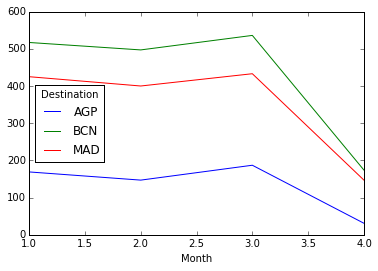

In [153]:
sol2.plot()